In [3]:
# Setup Imports
import numpy as np
import matplotlib.pyplot as plt

# Loading Results from OL2.py Application outputs
results = [{
        "label":"Cifar10 - ReLU",
        "data": np.loadtxt("cifar10-resnet-relu.txt"),
    },{
        "label":"Cifar100 - ReLU",
        "data": np.loadtxt("cifar100-resnet-relu.txt"),
    },{
        "label":"Cifar10 - GELU",
        "data": np.loadtxt("cifar10-resnet-relu.txt"),
    },{
        "label":"Cifar100 - GELU",
        "data": np.loadtxt("cifar10-resnet-relu.txt"),
    }]


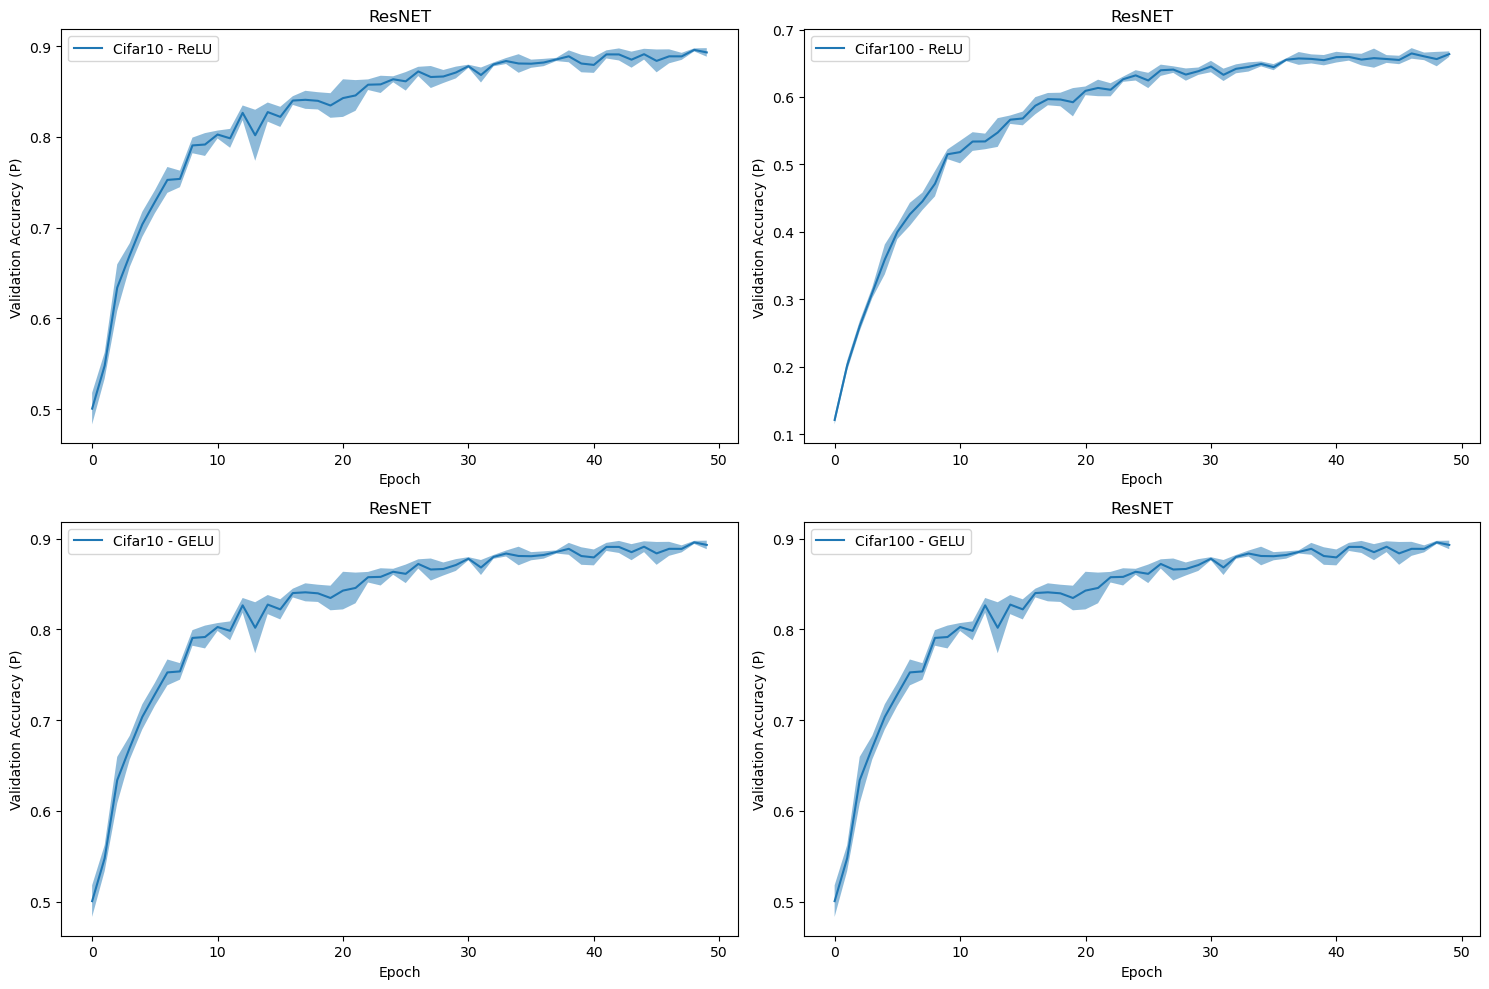

In [8]:
# Create a 2x2 grid for the Plots (subplots)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Default Values for all Plots
for i, axis in enumerate(axes.ravel()):

    # Setup Data Layers for Plots
    axis.set_title("ResNET")

    # Setup Adam - Optimized
    data = results[i]["data"]
    axis.plot(np.arange(0, data.shape[1]), np.mean(data, 0),label=results[i]["label"])
    axis.fill_between(np.arange(0, data.shape[1]), np.mean(data, 0)-(1.96*np.std(data, 0)/np.sqrt(data.shape[0])), np.mean(data, 0)+(1.96*np.std(data, 0)/np.sqrt(data.shape[0])), alpha=0.5)

    # General Setting and UI configs that are the same on each Plot
    axis.set_ylabel('Validation Accuracy (P)')
    axis.set_xlabel('Epoch')
    #axis.set_xticks(ticks=np.arange(0, 6), labels=np.arange(0, 60, 10))
    axis.legend() 

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

# Ansers to OL3 Questions:

## Answer 1


## Answer 2


## Answer 3


## Answer 4


## Answer 5


## Answer 6


## Answer 7

